## Step 2. Prepare the data
* Replace the column names (make them lowercase).
* Convert the data to the required types.
* Describe the columns where the data types have been changed and why.
* If necessary, decide how to deal with missing values:
  
  Explain why you filled in the missing values as you did or why you decided to leave them blank.
  
  Why do you think the values are missing? Give possible reasons.
  
  Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

* Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('moved_games.csv')

In [3]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games = games.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release': 'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [5]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [7]:
(games['year_of_release'].isnull().sum()/16715)*100

1.609332934489979

In [8]:
# IQR
Q1 = np.percentile(games['year_of_release'], 25, method='midpoint')
Q3 = np.percentile(games['year_of_release'], 75, method='midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(games['year_of_release']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(games['year_of_release']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: nan
0
Lower Bound: nan
0


In [9]:
games['year_of_release'].mean()

2006.4846163200777

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(2007)

In [11]:
print((games['critic_score'].isnull().sum()/16715)*100)
print((games['user_score'].isnull().sum()/16715)*100)
print((games['rating'].isnull().sum()/16715)*100)

51.31917439425665
54.59168411606342
40.478612025127134


In [12]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Step 3. Analyze the data
* Look at how many games were released in different years. Is the data for every period significant?
* Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
* Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
* Work only with the data that you've decided is relevant. Disregard the data for previous years.
* Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
* Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
* Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* Keeping your conclusions in mind, compare the sales of the same games on other platforms.
* Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

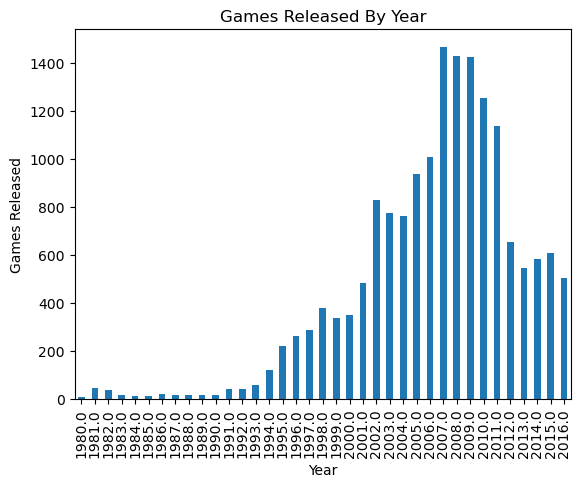

In [14]:
games_release = games.groupby('year_of_release')['name'].count()

games_release.plot(kind='bar', title='Games Released By Year', xlabel='Year', ylabel='Games Released')

plt.show()

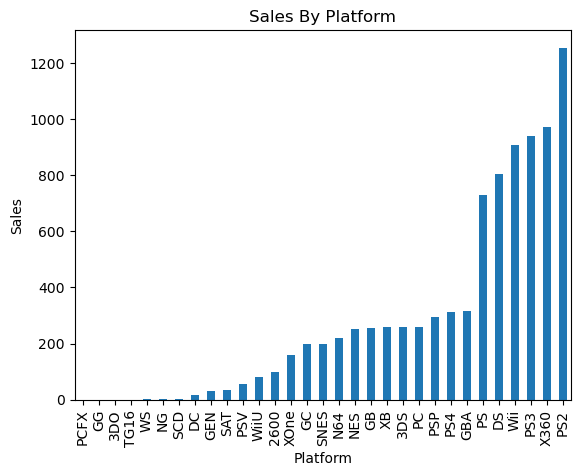

In [15]:
platform_sales = games.groupby('platform')['total_sales'].sum()

platform_sales_sorted = platform_sales.sort_values()

platform_sales_sorted.plot(kind='bar', title='Sales By Platform', xlabel='Platform', ylabel='Sales')

plt.show()

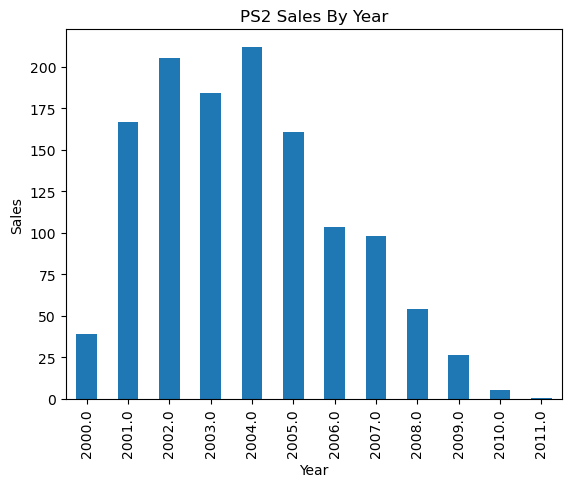

In [16]:
games_ps2 = games[games['platform']=='PS2']

games_release_ps2 = games_ps2.groupby('year_of_release')['total_sales'].sum()

games_release_ps2.plot(kind='bar', title='PS2 Sales By Year', xlabel='Year', ylabel='Sales')

plt.show()

Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [17]:
min_value = games.groupby(['platform','year_of_release']).sum().min()
min_value

C:\Users\minec\AppData\Local\Temp\ipykernel_17072\2323349071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  min_value = games.groupby(['platform','year_of_release']).sum().min()


na_sales        0.00
eu_sales        0.00
jp_sales        0.00
other_sales     0.00
critic_score    0.00
user_score      0.00
total_sales     0.02
dtype: float64

In [18]:
def zero_sales(platform):
    
    games_platform = games[games['platform']== platform]
    
    array = games_platform.groupby('year_of_release')['total_sales'].sum()
    
    last_game_year = games[games['platform'] == platform]['year_of_release'].max()
    
    years_since_last_game = 2016 - last_game_year
    
    message = f'{platform}: {years_since_last_game} years since the last game was released'
    
    games_zero = []
    
    for i in array:
        if i <= 0.05:
            
            return message

In [19]:
list = games['platform'].unique()

for i in list:
    message = zero_sales(i)
    if message is not None:
        print(zero_sales(i))

DS: 3.0 years since the last game was released
PC: 0.0 years since the last game was released
DC: 8.0 years since the last game was released
3DO: 21.0 years since the last game was released
GG: 24.0 years since the last game was released
PCFX: 20.0 years since the last game was released


### Work only with the data that you've decided is relevant. Disregard the data for previous years.
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [20]:
games_two = games[games['year_of_release']>=2014]

In [21]:
games_two.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

C:\Users\minec\AppData\Local\Temp\ipykernel_17072\2899052782.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_plot = filtered.groupby('year_of_release').sum()
C:\Users\minec\AppData\Local\Temp\ipykernel_17072\2899052782.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_plot = filtered.groupby('year_of_release').sum()
C:\Users\minec\AppData\Local\Temp\ipykernel_17072\2899052782.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

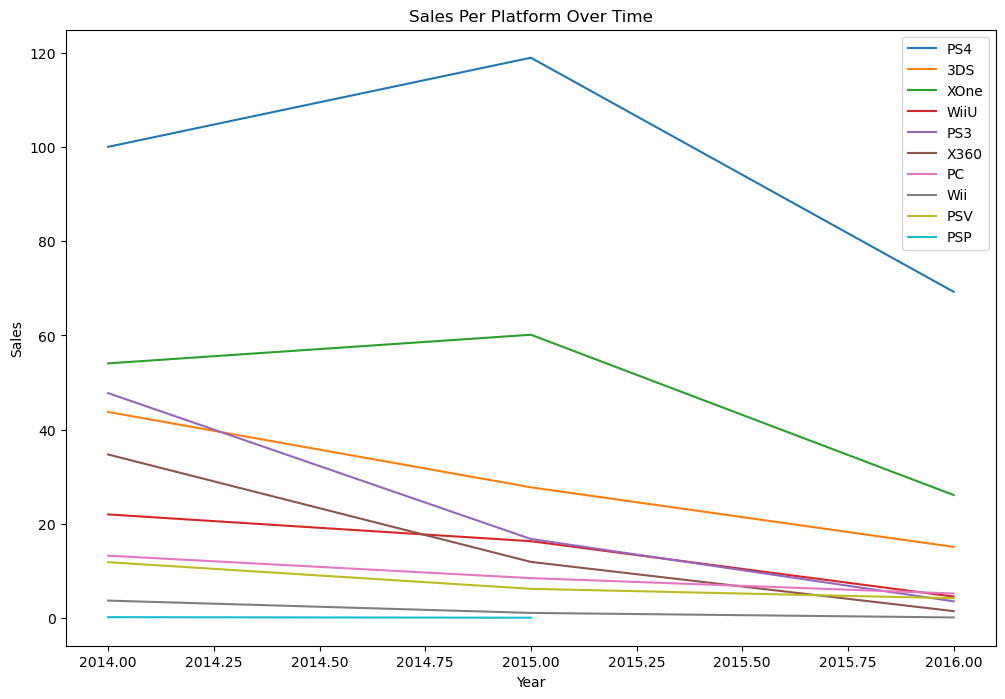

In [22]:
platforms_two = games_two['platform'].unique()

plt.figure(figsize=(12, 8))

for platform in platforms_two:
    
    filtered = games_two[games_two['platform']==platform]
    
    to_plot = filtered.groupby('year_of_release').sum()
    
    plt.plot(to_plot['total_sales'], label=platform)
    
    plt.title('Sales Per Platform Over Time')

    plt.ylabel('Sales')

    plt.xlabel('Year')

    plt.legend()

    
    
  

### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

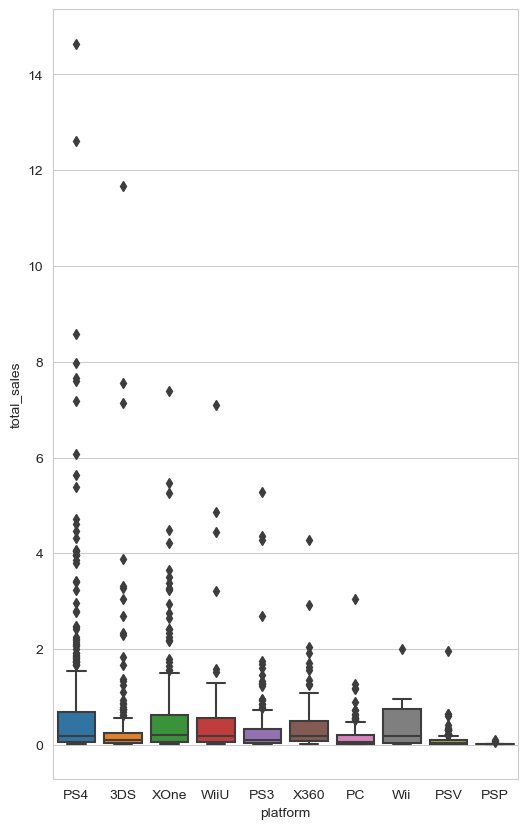

In [23]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 10))

sns.boxplot(x='platform', y='total_sales', data=games_two)

plt.show()

### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [24]:
games_two_ps4 = games_two[games_two['platform']=='PS4']

# Calculate the correlation matrix
corr_mat = games_two_ps4.corr()

# Use the 'loc' attribute to select the desired rows and columns
final_corr = corr_mat.loc['total_sales', 'critic_score':'user_score']

# Print the selected rows and columns
final_corr

C:\Users\minec\AppData\Local\Temp\ipykernel_17072\88157062.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = games_two_ps4.corr()


critic_score    0.402661
user_score     -0.040132
Name: total_sales, dtype: float64

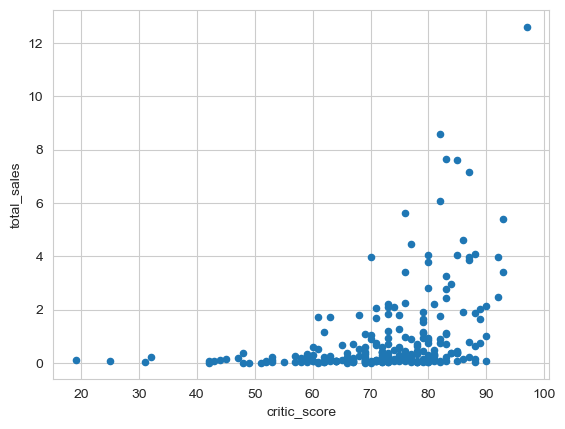

In [25]:
games_two_ps4.plot(y='total_sales', x='critic_score', kind='scatter')
plt.show() 

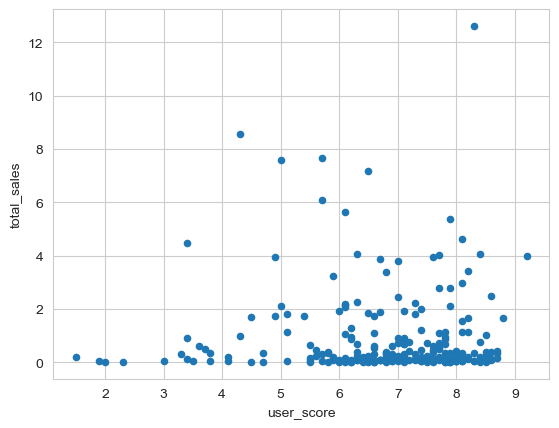

In [26]:
games_two_ps4.plot(y='total_sales', x='user_score', kind='scatter')
plt.show() 

In [27]:
top_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

temp = []

for platform in top_platforms:
    
    filtered = games_two[games_two['platform'] == platform]
    
    top_games = filtered.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5)
    
    top_games = top_games.reset_index()
    
    top_games.rename(columns={'name':platform}, inplace=True)
    
    temp.append(top_games)

# Concatenate the DataFrames for each platform
result_df = pd.concat(temp, axis=1)

# Print the result DataFrame
result_df

,PS4,total_sales,XOne,total_sales,3DS,total_sales,PS3,total_sales,X360,total_sales
0,Call of Duty: Black Ops 3,14.63,Call of Duty: Black Ops 3,7.39,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68,Minecraft,5.27,Call of Duty: Advanced Warfare,4.28
1,Grand Theft Auto V,12.62,Grand Theft Auto V,5.47,Super Smash Bros. for Wii U and 3DS,7.55,Call of Duty: Advanced Warfare,4.36,FIFA 15,2.92
2,FIFA 16,8.58,Call of Duty: Advanced Warfare,5.26,Pokemon Sun/Moon,7.14,FIFA 15,4.28,Madden NFL 15,2.05
3,Star Wars Battlefront (2015),7.98,Halo 5: Guardians,4.49,Monster Hunter 4 Ultimate,3.89,FIFA 16,2.70,Destiny,1.92
4,Call of Duty: Advanced Warfare,7.66,Fallout 4,4.22,Monster Hunter X,3.32,Watch Dogs,1.74,Call of Duty: Black Ops 3,1.70


In [28]:
games_two['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

<Axes: xlabel='genre'>

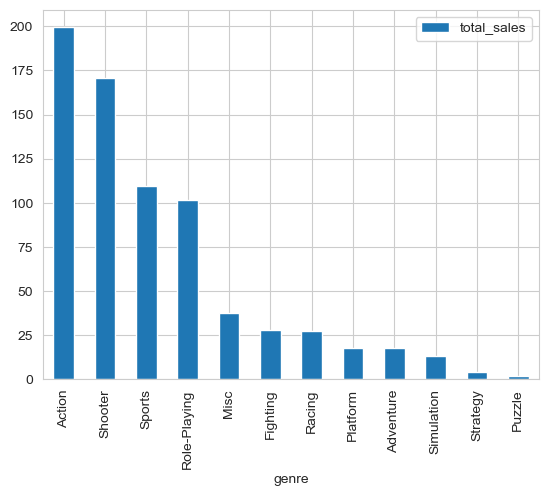

In [29]:
distribution = games_two.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
distribution.plot(kind='bar', x='genre', y='total_sales')

## Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

In [30]:
games_two.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [31]:
na_top_platforms = games_two.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_top_platforms.head(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

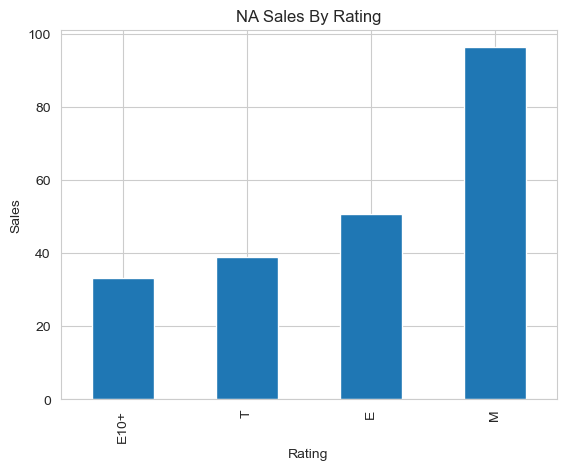

In [32]:
rating_na_sales = games_two.groupby('rating')['na_sales'].sum().sort_values()
rating_na_sales.plot(kind='bar', xlabel='Rating', ylabel='Sales', title='NA Sales By Rating')
plt.show()

In [33]:
eu_top_platforms = games_two.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_top_platforms.head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

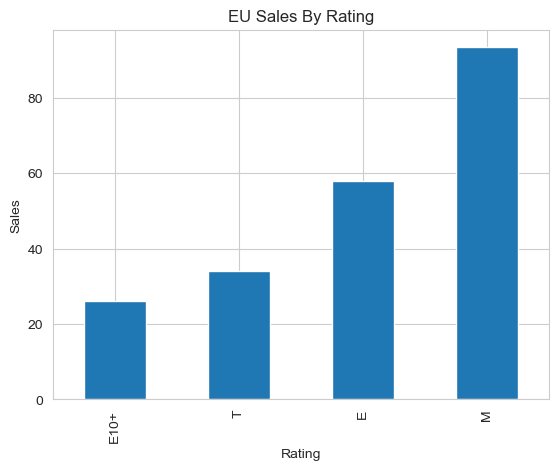

In [34]:
rating_eu_sales = games_two.groupby('rating')['eu_sales'].sum().sort_values()
rating_eu_sales.plot(kind='bar', xlabel='Rating', ylabel='Sales', title='EU Sales By Rating')
plt.show()

In [35]:
jp_top_platforms = games_two.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_top_platforms.head(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

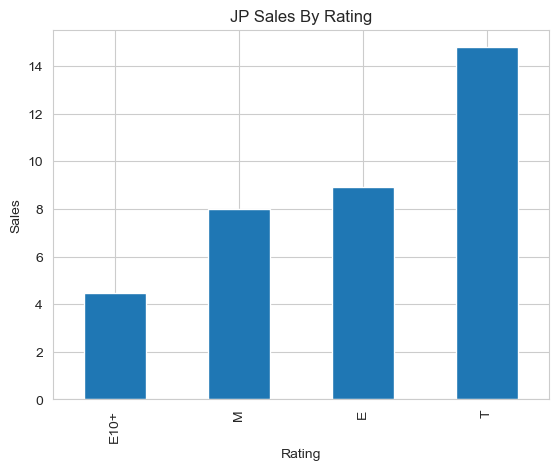

In [36]:
rating_jp_sales = games_two.groupby('rating')['jp_sales'].sum().sort_values()
rating_jp_sales.plot(kind='bar', xlabel='Rating', ylabel='Sales', title='JP Sales By Rating')
plt.show()

In [37]:
market_share = games_two.groupby('platform').sum()

market_share['na_market_share'] = market_share['na_sales']/market_share['total_sales']
market_share['eu_market_share'] = market_share['eu_sales']/market_share['total_sales']
market_share['jp_market_share'] = market_share['jp_sales']/market_share['total_sales']

market_share = market_share.drop(['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales'], axis=1)

market_share

C:\Users\minec\AppData\Local\Temp\ipykernel_17072\2422082262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  market_share = games_two.groupby('platform').sum()


,na_market_share,eu_market_share,jp_market_share
platform,,,
3DS,0.261191,0.185971,0.510383
PC,0.267283,0.664325,0.000000
PS3,0.323409,0.374597,0.164564
PS4,0.342218,0.451293,0.052126
PSP,0.000000,0.000000,1.000000
PSV,0.112500,0.157589,0.649107
Wii,0.410256,0.510848,0.000000
WiiU,0.450442,0.305956,0.170079
X360,0.586893,0.321236,0.001659


## Step 5. Test the following hypotheses:
* Average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:
* How you formulated the null and alternative hypotheses
* What significance level you chose to test the hypotheses, and why

### Average user ratings of the Xbox One and PC platforms are the same.

In [38]:
# IQR
Q1 = np.percentile(games_two['user_score'], 25, method='midpoint')
Q3 = np.percentile(games_two['user_score'], 75, method='midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(games_two['user_score']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(games_two['user_score']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: nan
0
Lower Bound: nan
0


In [39]:
games_two['user_score'].mean()

6.623536036036036

In [40]:
games_two['user_score'] = games_two['user_score'].fillna(6.6)

C:\Users\minec\AppData\Local\Temp\ipykernel_17072\3868602949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_two['user_score'] = games_two['user_score'].fillna(6.6)


In [41]:
xone_user = games_two[games_two['platform']=='XOne']['user_score']
xone_user.var()

xone_user_series = pd.Series(xone_user)

In [42]:
pc_user = games_two[games_two['platform']=='PC']['user_score']
pc_user.var()

pc_user_series = pd.Series(pc_user)

In [43]:
alpha = 0.05

results = st.ttest_ind(xone_user_series, pc_user_series, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.1038921543528455
We can't reject the null hypothesis


### Average user ratings for the Action and Sports genres are different.

In [44]:
action_user = games_two[games_two['genre']=='Action']['user_score']
action_user.var()

action_user_series = pd.Series(action_user)

In [45]:
sports_user = games_two[games_two['genre']=='Sports']['user_score']
sports_user.var()

sports_user_series = pd.Series(sports_user)

In [46]:
alpha = 0.05

results = st.ttest_ind(action_user_series, sports_user_series, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 5.204299675130368e-14
We reject the null hypothesis
